In [1]:
# import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
from skimage.io import imread_collection
from skimage import data, img_as_float, io, exposure
import matplotlib
from natsort import natsorted, ns
# from fastai.vision.all import *

In [2]:
# listFiles = os.listdir('train_v2')
# listFiles = natsorted(listFiles)
# allImages = []
# for filename in listFiles:
#     temp = os.path.join('train_v2',filename)
#     allImages.append(io.imread(temp))

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
# train_names = [f for f in os.listdir("train_v2")]
train_names = [f for f in os.listdir("../IMAGE-PROCESSING-Main/train_v2")]
tr_n, val_n = train_test_split(train_names, test_size=0.05, random_state=42)

# segmentation_df = pd.read_csv(os.path.join('./', './train_ship_segmentations_v2.csv'))
segmentation_df = pd.read_csv(os.path.join('./', '../IMAGE-PROCESSING-Main/train_ship_segmentations_v2.csv'))

In [4]:
segmentation_df

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
...,...,...
231718,fffedbb6b.jpg,NaN
231719,ffff2aa57.jpg,NaN
231720,ffff6e525.jpg,NaN
231721,ffffc50b4.jpg,NaN


In [5]:
trainAllImages = set()
# for i in range(len(segmentation_df)):
#     temp = segmentation_df.loc[i]["EncodedPixels"]
#     if(type(temp)==str):
#         trainAllImages.append(segmentation_df.loc[i]["ImageId"])
# print(trainAllImages[0])

import math
# newSeg = pd.read_csv(os.path.join(PATH, SEGMENTATION))
# print(newSeg.iloc[0]['ImageId'])
# segDict = dict()
# print(newSeg.head)
for i in range(len(segmentation_df)):
    temp = segmentation_df.iloc[i]['EncodedPixels']
    # print(temp)
    if(type(temp)==str):
        trainAllImages.add(segmentation_df.iloc[i]['ImageId'])
print(len(trainAllImages))

42556


In [6]:
# print(trainAllImages[1])

In [7]:
from skimage import transform
trainImages = natsorted(trainAllImages)
imagesList = []
count = 0
for i in range(count,2000):
    # temp1 = os.path.join('train_v2',trainImages[i])
    temp1 = os.path.join('../IMAGE-PROCESSING-Main/train_v2',trainImages[i])
    tempImage = io.imread(temp1)
    tempImage = transform.resize(tempImage,(128,128))
#   allImages.append(io.imread(temp))
    imagesList.append(tempImage)



In [8]:
len(imagesList)

2000

In [9]:
# print(imagesList[1])

In [10]:
from skimage import filters
smoothenedImages = []
# smooothingResult = filters.gaussian(imagesList[1], sigma=1)
# io.imshow(smooothingResult)
for i in imagesList:
    smoothingResult = filters.gaussian(i,sigma = 0.5)
    smoothenedImages.append(smoothingResult)

c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\skimage\_shared\utils.py:293: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


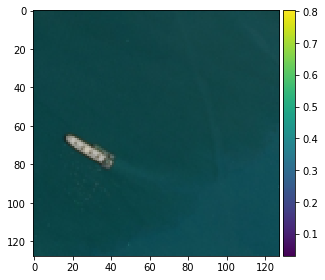

In [11]:
io.imshow(imagesList[1])

In [12]:
imagesEdges = []
for i in smoothenedImages:
    edgesResult = filters.sobel(i)
    imagesEdges.append(edgesResult)
    io.imsave("smoothened/{}".format(trainImages[count]), edgesResult)
    count+=1

C:\Users\manav\AppData\Local\Temp\ipykernel_13260\3688367445.py:5: UserWarning: smoothened/0a0df9b84.jpg is a low contrast image
  io.imsave("smoothened/{}".format(trainImages[count]), edgesResult)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\manav\AppData\Local\Temp\ipykernel_13260\3688367445.py:5: UserWarning: smoothened/0a0df8299.jpg is a low contrast image
  io.imsave("smoothened/{}".format(trainImages[count]), edgesResult)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\manav\AppData\Local\Temp\ipykernel_13260\3688367445.py:5: UserWarning: smoothened/0a1a2b14e.jpg is a low contrast image
  io.imsave("smoothened/{}".format(trainImages[count]), edgesResult)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0,

In [ ]:
io.imshow(imagesEdges[1])